author: mobin habibpour 98201727

mobin.habibpour@gmail.com

downloading and importing the required data

In [ ]:
!gdown --id 1sq18MxrJKh1KbjeSo3OKzmlhD3puUD37
# !gdown https://datahub.io/machine-learning/creditcard/r/creditcard.csv

import pandas as pd
import numpy as np

creditcard = pd.read_csv('creditcard.csv')
creditcard = pd.DataFrame(creditcard)

creditcard.head(5)

Downloading...
From: https://drive.google.com/uc?id=1sq18MxrJKh1KbjeSo3OKzmlhD3puUD37
To: /content/creditcard.csv
151MB [00:01, 128MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [ ]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)
'0'    284315
'1'       492
Name: Class, dtype: int64
The number of normal transactions( Class 0) are:  284315
The number of fraudulent transactions( Class 1) are:  492


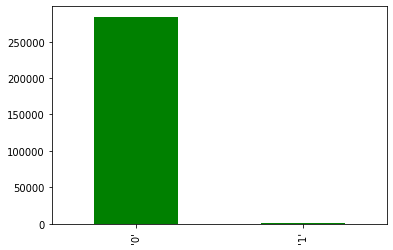

In [ ]:
print(creditcard.shape)
item_counts = creditcard["Class"].value_counts()
print(item_counts)

print("The number of normal transactions( Class 0) are: ", item_counts[0])
print("The number of fraudulent transactions( Class 1) are: ", item_counts[1])

count_Class=pd.value_counts(creditcard["Class"], sort= True)
count_Class.plot(kind= 'bar', color='g')

calculating accuracy incase the classifier is flawed and only able to classify one class correctly

In [ ]:
acc = item_counts[0]/(item_counts[0]+ item_counts[1])
print('defective classifier score:', acc)

defective classifier score: 0.9982725143693799


as we saw earlier, due to highier number of one class in comparision to the other, even if the classifier performs poorly we wont be able to tell, since the classifier score is still high enough. in these cases when there is dramatical difference between class population, the accuracy wont be a good assesment toolkit for the classifier's performance. instead, checking false-positive and false-negative gives us better understanding.

In [ ]:
from sklearn.model_selection import train_test_split

y = creditcard['Class']
X = creditcard.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Sensitivity :  0.9996658694428813
Specificity :  0.29591836734693877
              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     56864
         '1'       0.60      0.30      0.40        98

    accuracy                           1.00     56962
   macro avg       0.80      0.65      0.70     56962
weighted avg       1.00      1.00      1.00     56962



' as we can see eventhough there is 19 + 69 misclassified data, the accuracy shows a great classifier which is far from truth \nchecking the sensetivity and specificity proves the previous my point'

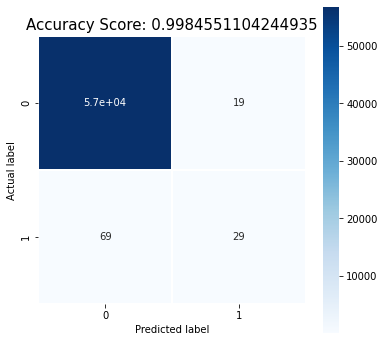

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svclassifier.predict(X_test)

def Confusion_Matrix(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Sensitivity(recall) = TP / (FN + TP)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity )

    # specificity = TN/(TN + FP)
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)

    print(classification_report(y_test, y_pred))

Confusion_Matrix(y_test, y_pred)
''' as we can see eventhough there is 19 + 69 misclassified data, the accuracy shows a great classifier which is far from truth 
checking the sensetivity and specificity proves the previous my point'''

In [ ]:
#fraudulent dataframe
fraud_df = creditcard.loc[creditcard['Class'] == "'1'"]

normal_index= creditcard[creditcard["Class"]== "'0'" ].index

# choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.array(np.random.choice(normal_index, item_counts[1], replace= False))
non_fraud_df = creditcard.iloc[random_normal_indices, :]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# use the undersampled indices to build the undersampled_data dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df['Class'].value_counts()

'1'    492
'0'    492
Name: Class, dtype: int64

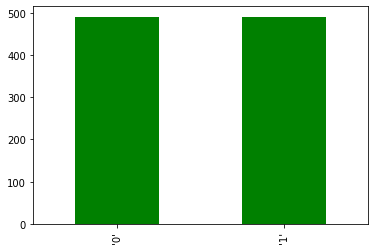

In [ ]:
count_sampled = pd.value_counts(new_df["Class"], sort= True)
count_sampled.plot(kind= 'bar',color='g')

In [ ]:
X = new_df.drop(columns='Class', axis=1) 
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = [{'C': [10, 1, .1, .01], 'kernel': ['linear']},
              {'C': [10, 1, .1, .01], 'kernel': ['rbf'], 
              'gamma': [0.1, 0.2, 0.4, 0.8, 0.9]}]

classifier= SVC()

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9078304331728988
The best parameters for using this model is {'C': 0.1, 'kernel': 'linear'}


Sensitivity :  0.9924242424242424
Specificity :  0.7631578947368421
              precision    recall  f1-score   support

         '0'       0.83      0.99      0.90       132
         '1'       0.99      0.76      0.86       114

    accuracy                           0.89       246
   macro avg       0.91      0.88      0.88       246
weighted avg       0.90      0.89      0.88       246



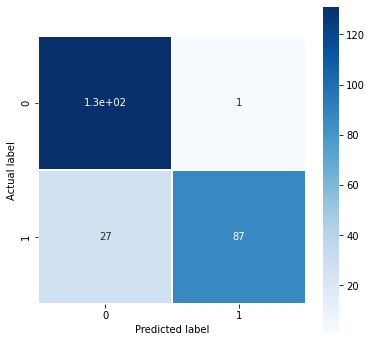

In [ ]:
best_classifier = SVC(C= best_parameters["C"], kernel= best_parameters["kernel"], random_state= 0)
best_classifier.fit(X_train, y_train.ravel())

y_pred = best_classifier.predict(X_test)

Confusion_Matrix(y_test, y_pred)

Testing the model against the full dataset

Sensitivity :  0.9922749598508915
Specificity :  0.8014705882352942
              precision    recall  f1-score   support

         '0'       1.00      0.99      1.00     85307
         '1'       0.14      0.80      0.24       136

    accuracy                           0.99     85443
   macro avg       0.57      0.90      0.62     85443
weighted avg       1.00      0.99      0.99     85443



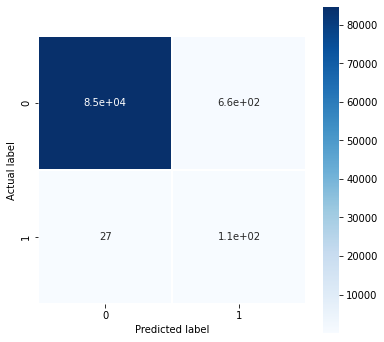

In [ ]:
y = creditcard['Class']
X = creditcard.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

y_pred = best_classifier.predict(X_test)

Confusion_Matrix(y_test, y_pred)